# Comparison between Biased SVM and Ridge Regression for Guilty Targets using OpenBEL networks

## Imports and Definitions

In [1]:
from GAT2VEC.gat2vec import Gat2Vec
from guilty_phewas import pulearn
from guiltytargets.constants import gat2vec_config
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dir_ = "C:/Users/Mauricio/Thesis/bel_data/alzh"

# move to constants
tr = [0.1, 0.3, 0.5]
walk_length = 4
num_walks = 30
window_size = 10
dimension = 128

# in case I don't use the `balanced` 
p_weights = [10., 20.]  # , 30., 40.]
n_weights = [.6] # , .3, .1]  # , .01] this is taking too long

In [2]:
g2v = Gat2Vec(dir_, dir_, label=False, tr=[0.1, 0.3, 0.5])


model = g2v.train_gat2vec(
    num_walks,
    walk_length,
    dimension,
    window_size,
    output=True,
)

Initializing gat2vec
loading structural graph
C:/Users/Mauricio/Thesis/bel_data/alzh\alzh_graph.adjlist
Number of nodes: 20720
loading attribute graph
C:/Users/Mauricio/Thesis/bel_data/alzh\alzh_na.adjlist
Number of nodes: 20720
Random Walks on Structural Graph
Random Walks on Attribute Graph
Learning Representation
Learned Representation Saved


In [3]:
%%time

fig, axs = plt.subplots(len(p_weights), len(n_weights))

pul = pulearn.PULearn(dir_, dir_, tr=gat2vec_config.training_ratio)
print('PU created.')

opt_matrix = {}
for p in p_weights:
    optmization = pd.DataFrame()
    for n in n_weights:
        auc_df = pul.evaluate(model, label=False, evaluation_scheme="bsvm", cost_p=p, cost_n=n)
        optmization.loc[:, f'p {p}/n {n}'] = auc_df['auc']
        print(auc_df)
    opt_matrix[p] = optmization.copy()
    optmization.boxplot(figsize=[10, 5]);

PU created.


C:\Users\Mauricio\Anaconda3\lib\site-packages\GAT2VEC\parsers.py:22: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  return df.as_matrix(columns=df.columns[0:])


TR 0 {0: 4126, 1: 19}
TR 0 {0: 4131, 1: 14}
TR 0 {0: 4126, 1: 18}
TR 0 {0: 4116, 1: 27}
TR 0 {0: 4107, 1: 36}
TR 1 {0: 4134, 1: 11}
TR 1 {0: 4124, 1: 21}
TR 1 {0: 4120, 1: 24}
TR 1 {0: 4124, 1: 19}
TR 1 {0: 4116, 1: 27}
TR 2 {0: 4127, 1: 18}
TR 2 {0: 4122, 1: 23}
TR 2 {0: 4125, 1: 19}
TR 2 {0: 4115, 1: 28}
TR 2 {0: 4121, 1: 22}
TR 3 {0: 4120, 1: 25}
TR 3 {0: 4121, 1: 24}
TR 3 {0: 4120, 1: 24}
TR 3 {0: 4121, 1: 22}
TR 3 {0: 4116, 1: 27}
TR 4 {0: 4129, 1: 16}
TR 4 {0: 4124, 1: 21}
TR 4 {0: 4125, 1: 19}
TR 4 {0: 4114, 1: 29}
TR 4 {0: 4119, 1: 24}
TR 5 {0: 4126, 1: 19}
TR 5 {0: 4134, 1: 11}
TR 5 {0: 4120, 1: 24}
TR 5 {0: 4117, 1: 26}
TR 5 {0: 4113, 1: 30}
TR 6 {0: 4126, 1: 19}
TR 6 {0: 4128, 1: 17}
TR 6 {0: 4120, 1: 24}
TR 6 {0: 4116, 1: 27}
TR 6 {0: 4130, 1: 13}
TR 7 {0: 4127, 1: 18}
TR 7 {0: 4124, 1: 21}
TR 7 {0: 4123, 1: 21}
TR 7 {0: 4117, 1: 26}
TR 7 {0: 4116, 1: 27}
TR 8 {0: 4121, 1: 24}
TR 8 {0: 4123, 1: 22}
TR 8 {0: 4123, 1: 21}
TR 8 {0: 4123, 1: 20}
TR 8 {0: 4124, 1: 19}
TR 9 {0: 4

C:\Users\Mauricio\Anaconda3\lib\site-packages\GAT2VEC\parsers.py:22: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  return df.as_matrix(columns=df.columns[0:])


TR 0 {0: 4076, 1: 69}
TR 0 {0: 4083, 1: 62}
TR 0 {0: 4076, 1: 68}
TR 0 {0: 4078, 1: 65}
TR 0 {0: 4077, 1: 66}
TR 1 {0: 4076, 1: 69}
TR 1 {0: 4078, 1: 67}
TR 1 {0: 4085, 1: 59}
TR 1 {0: 4070, 1: 73}
TR 1 {0: 4080, 1: 63}
TR 2 {0: 4096, 1: 49}
TR 2 {0: 4072, 1: 73}
TR 2 {0: 4086, 1: 58}
TR 2 {0: 4063, 1: 80}
TR 2 {0: 4059, 1: 84}
TR 3 {0: 4095, 1: 50}
TR 3 {0: 4079, 1: 66}
TR 3 {0: 4071, 1: 73}
TR 3 {0: 4067, 1: 76}
TR 3 {0: 4057, 1: 86}
TR 4 {0: 4096, 1: 49}
TR 4 {0: 4075, 1: 70}
TR 4 {0: 4063, 1: 81}
TR 4 {0: 4060, 1: 83}
TR 4 {0: 4078, 1: 65}
TR 5 {0: 4090, 1: 55}
TR 5 {0: 4079, 1: 66}
TR 5 {0: 4068, 1: 76}
TR 5 {0: 4064, 1: 79}
TR 5 {0: 4079, 1: 64}
TR 6 {0: 4076, 1: 69}
TR 6 {0: 4084, 1: 61}
TR 6 {0: 4076, 1: 68}
TR 6 {0: 4064, 1: 79}
TR 6 {0: 4080, 1: 63}
TR 7 {0: 4065, 1: 80}
TR 7 {0: 4079, 1: 66}
TR 7 {0: 4080, 1: 64}
TR 7 {0: 4098, 1: 45}
TR 7 {0: 4059, 1: 84}
TR 8 {0: 4084, 1: 61}
TR 8 {0: 4061, 1: 84}
TR 8 {0: 4062, 1: 82}
TR 8 {0: 4087, 1: 56}
TR 8 {0: 4075, 1: 68}
TR 9 {0: 4

PU created.


C:\Users\Mauricio\Anaconda3\lib\site-packages\GAT2VEC\parsers.py:22: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  return df.as_matrix(columns=df.columns[0:])


TR 0
TR 0
TR 0
TR 0
TR 0
TR 1
TR 1
TR 1
TR 1
TR 1
TR 2
TR 2
TR 2
TR 2
TR 2
TR 3
TR 3
TR 3
TR 3
TR 3
TR 4
TR 4
TR 4
TR 4
TR 4
TR 5
TR 5
TR 5
TR 5
TR 5
TR 6
TR 6
TR 6
TR 6
TR 6
TR 7
TR 7
TR 7
TR 7
TR 7
TR 8
TR 8
TR 8
TR 8
TR 8
TR 9
TR 9
TR 9
TR 9
TR 9
Training Finished
TR 0
TR 0
TR 0
TR 0
TR 0
TR 1
TR 1
TR 1
TR 1
TR 1
TR 2
TR 2
TR 2
TR 2
TR 2
TR 3
TR 3
TR 3
TR 3
TR 3
TR 4
TR 4
TR 4
TR 4
TR 4
TR 5
TR 5
TR 5
TR 5
TR 5
TR 6
TR 6
TR 6
TR 6
TR 6
TR 7
TR 7
TR 7
TR 7
TR 7
TR 8
TR 8
TR 8
TR 8
TR 8
TR 9
TR 9
TR 9
TR 9
TR 9
Training Finished


C:\Users\Mauricio\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


TR 0
TR 0
TR 0
TR 0
TR 0
TR 1
TR 1
TR 1
TR 1
TR 1
TR 2
TR 2
TR 2
TR 2
TR 2
TR 3
TR 3
TR 3
TR 3
TR 3
TR 4
TR 4
TR 4
TR 4
TR 4
TR 5
TR 5
TR 5
TR 5
TR 5
TR 6
TR 6
TR 6
TR 6
TR 6
TR 7
TR 7
TR 7
TR 7
TR 7
TR 8
TR 8
TR 8
TR 8
TR 8
TR 9
TR 9
TR 9
TR 9
TR 9
Training Finished
TR 0
TR 0
TR 0
TR 0
TR 0
TR 1
TR 1
TR 1
TR 1
TR 1
TR 2
TR 2
TR 2
TR 2
TR 2
TR 3
TR 3
TR 3
TR 3
TR 3
TR 4
TR 4
TR 4
TR 4
TR 4
TR 5
TR 5
TR 5
TR 5
TR 5
TR 6
TR 6
TR 6
TR 6
TR 6
TR 7
TR 7
TR 7
TR 7
TR 7
TR 8
TR 8
TR 8
TR 8
TR 8
TR 9
TR 9
TR 9
TR 9
TR 9
Training Finished
TR 0
TR 0
TR 0
TR 0
TR 0
TR 1
TR 1
TR 1
TR 1
TR 1
TR 2
TR 2
TR 2
TR 2
TR 2
TR 3
TR 3
TR 3
TR 3
TR 3
TR 4
TR 4
TR 4
TR 4
TR 4
TR 5
TR 5
TR 5
TR 5
TR 5
TR 6
TR 6
TR 6
TR 6
TR 6
TR 7
TR 7
TR 7
TR 7
TR 7
TR 8
TR 8
TR 8
TR 8
TR 8
TR 9
TR 9
TR 9
TR 9
TR 9
Training Finished
TR 0
TR 0
TR 0
TR 0
TR 0
TR 1
TR 1
TR 1
TR 1
TR 1
TR 2
TR 2
TR 2
TR 2
TR 2
TR 3
TR 3
TR 3
TR 3
TR 3
TR 4
TR 4
TR 4
TR 4
TR 4
TR 5
TR 5
TR 5
TR 5
TR 5
TR 6
TR 6
TR 6
TR 6
TR 6
TR 7
TR 7
TR 7
TR 7
T

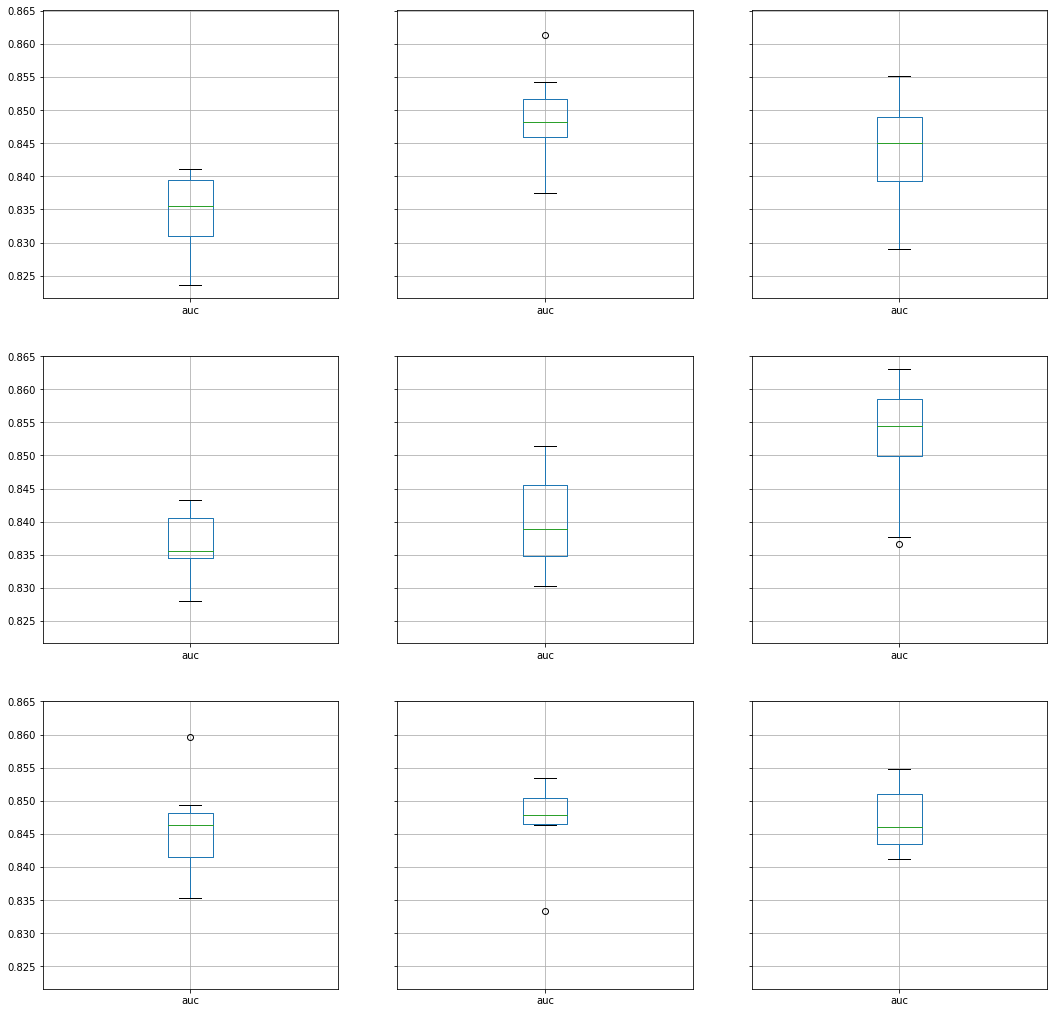

In [3]:
%%time

p_weights = [5., 10., 20.]  # , 30., 40.]  # 10
n_weights = [.1, .3, .6] # .01, this is taking too long #  .6


pul = pulearn.PULearn(dir_, dir_, tr=gat2vec_config.training_ratio)
print('PU created.')

fig, axs = plt.subplots(len(p_weights), len(n_weights), sharey=True)

fig.set_size_inches(18, 18)

for i, p in enumerate(p_weights):
    optmization = pd.DataFrame()
    for j, n in enumerate(n_weights):
        auc_df = pul.evaluate(model, label=False, evaluation_scheme="bsvm", cost_p=p, cost_n=n)
        auc_df.boxplot(column=['auc'], ax=axs[i][j])
   


In [ ]:
plt.show()